<a href="https://colab.research.google.com/github/tvanshika11/Doingsome-basic-functionalities-using-open-cv/blob/master/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

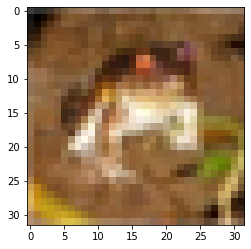

In [6]:
plt.imshow(X_train[0])

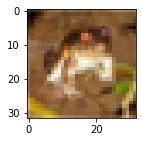

In [7]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

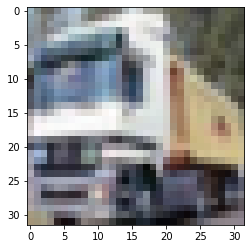

In [9]:
plt.imshow(X_train[1])

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

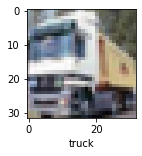

In [16]:
plot_sample(X_train,y_train,1)

**Normalising train and test sets by dividing by 255*

In [17]:
X_train = X_train/255
X_test = X_test/255

In [19]:
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         #dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4728 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1414 - accuracy: 0.5978
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0166 - accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9386 - accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8689 - accuracy: 0.6960
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8170 - accuracy: 0.7136
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7778 - accuracy: 0.7283
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7348 - accuracy: 0.7435
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7010 - accuracy: 0.7553
Epoch 10/10
1563/1563 [==============================] - 51s 32m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9145 - accuracy: 0.6935


[0.9144654273986816, 0.6934999823570251]

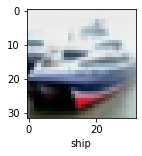

In [23]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.5140332e-03, 1.4895861e-04, 1.9655118e-02, 6.3525194e-01,
        4.0855125e-02, 2.0141359e-01, 9.9581301e-02, 1.5751435e-04,
        6.3902064e-04, 7.8340230e-04],
       [1.1430098e-02, 2.2118639e-02, 1.0996126e-07, 8.2776285e-07,
        4.8616838e-10, 7.6511029e-09, 6.1627321e-09, 2.4105844e-07,
        9.6622223e-01, 2.2777653e-04],
       [1.0628529e-01, 2.8017638e-02, 3.2146927e-03, 6.9156731e-03,
        7.1368291e-04, 1.6361194e-03, 1.5028517e-04, 2.8708810e-02,
        7.0670187e-01, 1.1765591e-01],
       [9.5816213e-01, 4.3908143e-03, 1.5344517e-03, 4.1032484e-04,
        8.2284394e-05, 7.6559336e-06, 9.5520780e-05, 4.1543470e-05,
        3.4086950e-02, 1.1883593e-03],
       [3.3582073e-05, 3.4066728e-05, 5.4446287e-02, 1.1867529e-02,
        4.1928640e-01, 6.3668919e-04, 5.1344544e-01, 5.3820313e-05,
        9.4817842e-06, 1.8677134e-04]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
classes[y_classes[5]]

'frog'

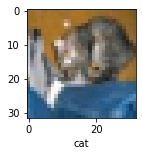

In [30]:
plot_sample(X_test,y_test,0)

In [32]:
classes[y_classes[0]]

'cat'